## Question 1

# Rasmus Durgé, Anton Danielli
## Time spent : 40, 40

In this first question we work with the deterministic MDP, no code is necessary in this part.

Setup:

* The agent starts in state **S**
* The actions possible are **N** (north), **S** (south), **E** (east), and **W** west. 
* Note, that you cannot move outside the grid, thus all actions are not available in every box.
* When reaching **F**, the game ends (absorbing state).
* The numbers in the boxes represent the rewards you receive when moving into that box. 
* Assume no discount in this model: $\gamma = 1$

The reward of a state $r(s=(x, y))$ is given by the values on the grid:
    
| | | |
|----------|----------|---------|
|-1 |1|**F**|
|0|-1|1|  
|-1 |0|-1|  
|**S**|-1|1|

Let $(x,y)$ denote the position in the grid, such that $S=(0,0)$ and $F=(2,3)$.

**1 Answer the following questions (1p)**

**a)** What is the optimal path of the MDP above? Is it unique? Submit the path as a single string of directions. E.g. NESW will make a circle.

**b)** What is the optimal policy (i.e. the optimal action in each state)?

**c)** What is expected total reward for the policy in 1b)?


**1 a)** 

There are two optimal paths with regards to rewards received. EENNN and EENNWNE. The second path is longer but they both end up with a reward score of 0.

**1 b)** When creating a policy we want to get a $\pi$ that yields the maximal reward $V$. $\pi$ should tell us what action to take in every state. In this case we create a deterministic policy, i.e. an action is given for every state.
We assume that $\gamma = 1$. Moving in $N,W,E,S$ \\
1) Always choose best reward. \\
2) If we recieve the same rewards from every direction, go east. \\
3) Dont visit previously visited states, or you'll end up in infinite loops.



**1 c)**
0




## Value Iteration

For larger problems we need to utilize algorithms to determine the optimal policy $\pi^*$. *Value iteration* is one such algorithm that iteratively computes the value for each state. Recall that for a policy to be optimal, it must satisfy the Bellman equation above, meaning that plugging in a given candidate $V^*$ in the right-hand side (RHS) of the Bellman equation should result in the same $V^*$ on the left-hand side (LHS). This property will form the basis of our algorithm. Essentially, it can be shown that repeated application of the RHS to any intial value function $V^0(s)$ will eventually lead to the value $V$ which statifies the Bellman equation. Hence repeated application of the Bellman equation will also lead to the optimal value function. We can then extract the optimal policy by simply noting what actions that satisfy the equation. The process of repeated application of the Bellman equation what we here call the _value iteration_ algorithm.

The value iteration algorithm practically procedes as follows:

```
epsilon is a small value, threshold
for x from i to infinity 
do
    for each state s
    do
        V_k[s] = max_a Σ_s' p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
    end
    if  |V_k[s]-V_k-1[s]| < epsilon for all s
        for each state s,
        do
            π(s)=argmax_a ∑_s′ p(s′|s,a)*(r(a,s,s′) + γ*V_k−1[s′])
            return π, V_k 
        end
end

```






**Example:** We will illustrate the value iteration algorithm by going through two iterations. Below is a 3x3 grid with the rewards given in each state. Assume now that given a certain state $s$ and action $a$, there is a probability of 0.8 that that action will be performed and a probability of 0.2 that no action is taken. For instance, if we take action **E** in state $(x,y)$ we will go to $(x+1,y)$ 80 percent of the time (given that that action is available in that state, that is, we stay on the grid), and remain still 20 percent of the time. We will use have a discount factor $\gamma = 0.9$. Let the initial value be $V^0(s)=0$ for all states $s\in S$. 

| | | |  
|----------|----------|---------|  
|0|0|0|
|0|10|0|  
|0|0|0|  


**Iteration 1**: The first iteration is trivial, $V^1(s)$ becomes the $\max_a \sum_{s'} p(s'|s,a) r(s,a,s')$ since $V^0$ was zero for all $s'$. The updated values for each state become

| | | |  
|----------|----------|---------|  
|0|8|0|
|8|2|8|  
|0|8|0|  
  
**Iteration 2**:  
  
Staring with cell (0,0) (lower left corner): We find the expected value of each move:  
Action **S**: 0  
Action **E**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **N**: 0.8( 0 + 0.9 \* 8) + 0.2(0 + 0.9 \* 0) = 5.76  
Action **W**: 0

Hence any action between **E** and **N** would be best at this stage.

Similarly for cell (1,0):

Action **N**: 0.8( 10 + 0.9 \* 2) + 0.2(0 + 0.9 \* 8) = 10.88 (Action **N** is the maximizing action)  

Similar calculations for remaining cells give us:

| | | |  
|----------|----------|---------|  
|5.76|10.88|5.76|
|10.88|8.12|10.88|  
|5.76|10.88|5.76|  


## Question 2 

**2a)** Implement the value iteration algorithm just described here in python, and show the converging optimal value function and the optimal policy for the above 3x3 grid. Hint: use the pseudo-code above as a starting point, but be sure to explain what every line does.(2.5p)

**2b)** Explain why the result of 2a) does not depend on the initial value $V_0$.(0.5p)

In [68]:
import numpy as np
import operator

def value_iter():
  #set parameters
  eps = 0.001
  value_matrix = np.zeros((3,3))
  policy = np.zeros((3,3),dtype=tuple)
  #for x from i to infty
  for i in range(0,10000):
    prev_matrix = value_matrix.copy()
    #for each state S, calculate the new value
    for i ,a in enumerate(value_matrix):
      for j, b in enumerate(value_matrix):
        value_matrix[i,j] = calculate_neighbour(value_matrix,i,j)
        #all values created
    #create counter, compare values for all states, if the difference between states are below eps we increment counter
    #if counter reaches 9 that means the value matrix have converged and we move on, else continue in the big for loop
    counter = 0  
    for i ,a in enumerate(value_matrix):
      for j, b in enumerate(value_matrix):
        if(np.abs(value_matrix[i,j] - prev_matrix[i,j]) < eps):
          counter = counter + 1
    if (counter < 9):
      continue
    #if we get to else the matrix have converged, go through the matrix and add policys
    
    for i ,a in enumerate(value_matrix):
      for j, b in enumerate(value_matrix):
        policy[i,j] = (calculate_policy(value_matrix,i,j))
      
  return policy, value_matrix
      

In [77]:
def calculate_neighbour(values,x,y):
  reward_matrix = np.zeros((3,3))
  reward_matrix[1,1] = 10
  stay = 0.2
  move = 0.8
  gamma = 0.9
  north = (-1,0)
  east = (0,1)
  south = (1,0)
  west = (0,-1)
  directions = [north,east,south,west]
  neighbour_values = []
  for i, j in enumerate(directions):
    #handle values outside the matrix, i.e. reward(2,3) etc
    try:
      temp = tuple(map(operator.add,[x,y],j))
      #directions[i] = temp
      #handle negative values, negative indices are ok but return unexpected things, i.e. returns last element etc
      if (temp[0] < 0 or temp[1] < 0):
        continue
      else:
        #if its not negative or outside matrix we assume legal movement, we put this value inside the array, i.e. it becomes an option
        #neighbour_values[i] = move * (reward_matrix[temp] + gamma*values[temp]) + stay * (reward_matrix[x,y] + gamma * values[x,y])
        neighbour_values.append(move * (reward_matrix[temp] + gamma*values[temp]) + stay * (reward_matrix[x,y] + gamma * values[x,y]))
    except:
      continue
      #neighbour_values.append()
      #we do not need to clear since we create new list every call
  max = np.max(neighbour_values)
  return max


2.595324483338453

In [86]:
def calculate_policy(value_matrix,x,y):
  #init  directions and a sorter list
  north = (-1,0)
  east = (0,1)
  south = (1,0)
  west = (0,-1)
  directions = [north,east,south,west]
  sorter = []
  #go through the directions (N,E,S,W)
  for i , a in enumerate(directions):
    #If we move outside the map -> append 0
    try:
      #temp = the coordinate we get from input + (N,E,S,W)
      temp = tuple(map(operator.add,(x,y),a))
      #If we get a negative coordinate append 0
      if (temp[0] < 0 or temp[1] < 0):
        sorter.append(0)
      else:
        sorter.append(value_matrix[temp])
    except:
      sorter.append(0)
      
  #When we have looped over all directions, we get the position of the biggest value.
  z = np.argmax(sorter)
  z = directions[z]
  if (z[0] == -1 and z[1] == 0):
    return 'N'
  if (z[0] == 0 and z[1] == 1):
    return 'E'
  if (z[0] == 1 and z[1] == 0):
    return 'S'
  else:
    return 'W'
  #return z


In [112]:
#Test
print('Policy matrix followed by the converged value matrix')
value_iter()


Policy matrix followed by the converged value matrix


(array([['E', 'S', 'S'],
        ['E', 'N', 'W'],
        ['N', 'N', 'N']], dtype=object),
 array([[45.61292366, 51.94805195, 45.61292366],
        [51.94805195, 48.05194805, 51.94805195],
        [45.61292366, 51.94805195, 45.61292366]]))

The result does not depend on the value of $V_{0}$ because we can see from the algorithm that the initial value gets multiplied by the discount factor $\gamma \in [0,1]$ in each iteration. In the pseudocode we loop infinitely, (or to convergence)thus the intial value will have a factor $\gamma^n$ making it converge to $0$

## Question 3 (1.5p)
You are to first familiarize with the framework using its [documentation](http://gym.openai.com/docs/), and then implement the Q-learning algorithm for the Chain enviroment (called 'NChain-v0') using default parameters. Finally print the $Q^*$ table at convergence. Convergence is **not** a constant value, rather a stable plateau with some noise. Take $\gamma=0.95$. You can refer to the Q-learning (frozen lake) Jupyter notebook shown in class, uploaded on Canvas. Hint: start with a small learning rate.

In [110]:
import gym
import random
import numpy as np
import math

env = gym.make('NChain-v0')

num_episodes = 2000
gamma = 0.95
learning_rate = 0.2
epsilon = 0.3


In [111]:
Q = np.zeros((5,2))

for _ in range(num_episodes):
	state = env.reset()
	done = False
	while done == False:
        # First we select an action:
		if random.uniform(0, 1) < epsilon: # Flip a skewed coin
			action = env.action_space.sample() # Explore action space
		else:
			action = np.argmax(Q[state,:]) # Exploit learned values
        # Then we perform the action and receive the feedback from the environment
		new_state, reward, done, info = env.step(action)
        # Finally we learn from the experience by updating the Q-value of the selected action
		update = reward + (gamma*np.max(Q[new_state,:])) - Q[state, action]
		Q[state,action] += learning_rate*update 
		state = new_state
  

In [109]:
Q

array([[44.93242908, 39.75470436],
       [50.02572372, 40.05701955],
       [53.29189898, 39.37403805],
       [47.80395759, 40.24469006],
       [46.4294544 , 41.5689417 ]])

## Question 4

**4a)** Define the MDP corresponding to the Chain environment above and verify that the optimal $Q^*$ value obtained using simple Q-learning is the same as the optimal value function $V^*$ for the corresponding MDP's optimal action. Hint: compare values obtained using value iteration and Q-learning.

**4b)** What is the importance of exploration in RL? Explain with an example.

Without exploration an algorithm could become hyper focused on one local areas solution with a local optimum. Through exploration and not always choosing the apparent 'correct' state it is possible to find a solution that is more optimized on a global scale. For example, the second solution to 1. a) 'EENNWNE', would not be found with a stricly exploitative strategy since its path could be interpereted as less optimized. Therefor exploration could help find a more diverse range of solutions.

## Question 5

**5a)** Give a summary of how a decision tree can be extended to random forests and how they work. (1.25p)

Decision tree is a supervised classification and regression method. It has a hierarchical structure where decisions are split in to two or more so called 'branches'. These branches lead into different nodes known as 'leaves'. It's these 'branches' and 'trees' that make up the tree. 

A use for a decision tree could be to define if a person is fit or not:
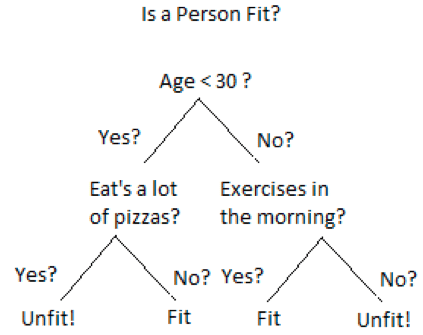

This is obiously an over simplification in defining fitness levels, but it illustrates how dicision trees work. An advantage of using decision trees are that they can be visually interpreted faily easily. A disadvantage is that small variations of the training data can result in different decision trees and in turn lead to a large variance in classifications.

This can be remedied by using an algorithm known as 'Random Forests'. It is also a supervised learning method that consists of an ensemble of decision trees. Using several decision trees to classify data can help mitigate the issue of having different trees being generated because of small variations in the data by limiting over-fitting.

**5b)** Explain what makes reinforcement learning different from supervised learning tasks such as regression or classification. (1.25p)

Supervised learning excels when working with well defined and labeled data. This makes supervised learning models excellent for making predictions based on input data, such as trying to forecast weather.

Reinforcement learning takes a more active learning approach where it interacts more with the environment. This environment can then be manipulated through incentives to help the model learn more optimized patterns or solutions by maximizing its reward. 

This means that, with well defined boundries and reward mechanisms, supervised learning can enable AI systems to learn how to play games such as Go and chess without feeding it training data.


# References
Primer/text based on the following references:
* http://www.cse.chalmers.se/~chrdimi/downloads/book.pdf
* https://github.com/olethrosdc/ml-society-science/blob/master/notes.pdf